In [ ]:
# Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

%store -r magnetic_data_ohe

from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn import metrics


linreg = LinearRegression()
loocv = model_selection.LeaveOneOut()

In [ ]:
# Format estimator and Target data
estimator = magnetic_data_ohe.loc[:, magnetic_data_ohe.columns != 'Magnetic Moment']
predictor = magnetic_data_ohe.loc[:, magnetic_data_ohe.columns == 'Magnetic Moment']

X_train, X_test, y_train, y_test = model_selection.train_test_split(estimator, predictor, test_size=0.25, random_state=123456)

In [ ]:
model = linreg.fit(X_train, y_train)

In [ ]:
model.score(X_train, y_train) # R^2 value

In [ ]:
#for idx, col_name in enumerate(X_train.columns):
#    print("The coefficient for {} is {}".format(col_name, model.coef_[0][idx]))

In [ ]:
X_test.shape

In [ ]:
X_test.shape

In [ ]:
test_model = linreg.fit(X_test, y_test)

In [ ]:
test_model.score(X_test, y_test) # R^2 valuefor idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, test_model.coef_[0][idx]))

In [ ]:
X_tes

In [4]:
final_model = linreg.fit(Input, Output)

In [5]:
final_model.score(Input, Output) # R^2 value

0.65235457622778847

In [28]:
final_model.get_params(True)

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'normalize': False}

In [29]:
for idx, col_name in enumerate(Input.columns):
    print("The coefficient for {} is {}".format(col_name, final_model.coef_[0][idx]))

The coefficient for U Level is 0.06107954545454544
The coefficient for Total D Electrons is -0.12792988954516638
The coefficient for D Spin State is 2.6960806887576334
The coefficient for Molecule_F16MPc is -0.21287878787878783
The coefficient for Molecule_MPc is 0.21287878787878786
The coefficient for Calc Type_metal is -0.28257575757575765
The coefficient for Calc Type_total is 0.28257575757575765


In [7]:
final_model_output = linreg.predict(Input)

In [62]:
import statsmodels.api as sm
sm_model = sm.OLS(Output, Input).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Magnetic Moment   R-squared:                       0.652
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     47.29
Date:                Mon, 05 Mar 2018   Prob (F-statistic):           2.55e-27
Time:                        12:49:03   Log-Likelihood:                -190.96
No. Observations:                 132   AIC:                             393.9
Df Residuals:                     126   BIC:                             411.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
U Level               0.0611      0.028      2.178      0.031       0.006       0.117
Total D Electrons    -0.1279      0.032     -4.013      0.000      -0.191      -0.065
D Spin State          2.6961      0.192     14.025      0.000       2.316       3.077
Molecule_F16MPc       0.4716      0.158      2.976      0.004       0.158       0.785
Molecule_MPc          0.8973      0.158      5.662      0.000       0.584       1.211
Calc Type_metal       0.4019      0.158      2.536      0.012       0.088       0.715
Calc Type_total       0.9670      0.158      6.102      0.000       0.653       1.281
==============================================================================
Omnibus:                       14.409   Durbin-Watson:                   0.871
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                6.264
Skew:                           0.295   Prob(JB):                       0.0436
Kurtosis:                       2.111   Cond. No.                     4.90e+16
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.36e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [26]:
metrics.r2_score(Output, final_model_output)

0.65235457622778847

Text(0,0.5,'Measured Magnetic Moment')

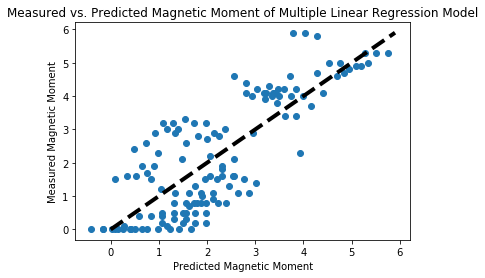

In [25]:
fig, ax = plt.subplots()
plt.scatter(final_model_output, Output.as_matrix())
ax.plot([Output.min(), Output.max()], [Output.min(), Output.max()], 'k--', lw=4)

plt.title('Measured vs. Predicted Magnetic Moment of Multiple Linear Regression Model')
ax.set_xlabel('Predicted Magnetic Moment')
ax.set_ylabel('Measured Magnetic Moment')

In [45]:
residual = Output.as_matrix() - final_model_output

Text(0,0.5,'Residual Error')

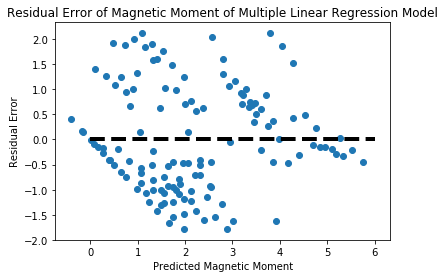

In [47]:
fig, ax = plt.subplots()
plt.scatter(final_model_output, residual)
ax.plot([0, 6],[0, 0], 'k--', lw=4)

plt.title('Residual Error of Magnetic Moment of Multiple Linear Regression Model')
ax.set_xlabel('Predicted Magnetic Moment')
ax.set_ylabel('Residual Error')

In [11]:
type(final_model_output)

numpy.ndarray

In [19]:
type(Output.as_matrix())

numpy.ndarray